In [2]:
#!pip install mediapipe

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\cv2\\LICENSE-3RD-PARTY.txt'
Consider using the `--user` option or check the permissions.



In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = "./datasets/train" 
test_path = "./datasets/test"

In [63]:
train_datagen = ImageDataGenerator(rescale=1./255, # Rescale the pixel values between 0 and 1
                                   shear_range=0.2, # Apply random shear transformation
                                   zoom_range=0.2, # Apply random zoom transformation
                                   horizontal_flip=True) # Flip the image horizontally

train_generator = train_datagen.flow_from_directory(
        './datasets/train',
        target_size=(224, 224), # Resize the images to 224x224 pixels
        batch_size=32,)
        #class_mode='categorical') # Set the class mode to categorical

test_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True) 

test_generator = test_datagen.flow_from_directory(
        './datasets/test',
        target_size=(224, 224), # Resize the images to 224x224 pixels
        batch_size=32,)
        #class_mode='categorical') # Set the class mode to categorical

Found 176 images belonging to 21 classes.
Found 63 images belonging to 21 classes.


In [64]:
(x_train, y_train) = next(train_generator)
(x_test, y_test) = next(test_generator)

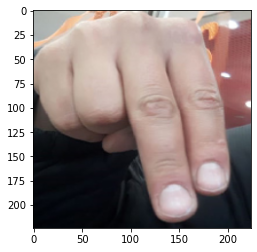

In [5]:
plt.imshow(x_train[1], cmap=plt.cm.binary)

In [65]:
print(x_train.shape)
print(x_test.shape)

(32, 224, 224, 3)
(32, 224, 224, 3)


In [66]:
print(y_train.shape)
print(y_test.shape)

(32, 21)
(32, 21)


In [8]:
x_train = x_train.reshape(32, -1)
x_test = x_test.reshape(32, -1)

In [9]:
#x_train = x_train.reshape(32, 50176)
#x_test = x_test.reshape(32, 50176)

In [67]:
print(x_train.shape)
print(x_test.shape)

(32, 224, 224, 3)
(32, 224, 224, 3)


In [11]:
target_dims = (224, 224, 3)

In [74]:
from keras import layers
from keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(21, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
model.fit(x_train, y_train, epochs=21)

Epoch 1/21
1/1 [==============================] - 1s 928ms/step - loss: 1.4701 - accuracy: 0.6562
Epoch 2/21
1/1 [==============================] - 1s 920ms/step - loss: 1.3749 - accuracy: 0.4688
Epoch 3/21
1/1 [==============================] - 1s 904ms/step - loss: 1.0001 - accuracy: 0.7500
Epoch 4/21
1/1 [==============================] - 1s 914ms/step - loss: 0.8768 - accuracy: 0.6562
Epoch 5/21
1/1 [==============================] - 1s 869ms/step - loss: 0.5461 - accuracy: 0.9375
Epoch 6/21
1/1 [==============================] - 1s 878ms/step - loss: 0.5021 - accuracy: 0.8125
Epoch 7/21
1/1 [==============================] - 1s 959ms/step - loss: 0.2636 - accuracy: 1.0000
Epoch 8/21
1/1 [==============================] - 1s 914ms/step - loss: 0.2047 - accuracy: 0.9688
Epoch 9/21
1/1 [==============================] - 1s 913ms/step - loss: 0.1943 - accuracy: 0.9062
Epoch 10/21
1/1 [==============================] - 1s 881ms/step - loss: 0.1752 - accuracy: 0.9688
Epoch 11/21
1/1 [==

In [79]:
model.save('my_model.22jesus')

INFO:tensorflow:Assets written to: my_model.22jesus\assets


In [81]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_model.22jesus')

In [78]:
test_loss, test_acc = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 279ms/step - loss: 21.9371 - accuracy: 0.0625


In [70]:
model = Sequential()
model.add(Dense(21, activation='sigmoid', input_shape=(150528,)))
model.add(Dense(21, activation='softmax'))

In [71]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 21)                3161109   
                                                                 
 dense_22 (Dense)            (None, 21)                462       
                                                                 
Total params: 3,161,571
Trainable params: 3,161,571
Non-trainable params: 0
_________________________________________________________________


En la primera capa por cada neurona i (entre 0 y 20) requerimos 50176 parámetros que corresponden a los pesos. <br> <br>
y= w*x + b <br> 
- y: Es la etiqueta de muestra de entrada. <br>
- x: Representa las características de la muestra. <br>
- w: Es la pendiente de la recta y que llamamos peso. Es uno de los 2 parámetros que tendrá que aprender el model durante el proceso de entrenamiento para poder usarlo luego en la inferencia <br>
- b: Es lo que llamamos sesgo (bias: ingles), es el otro de los parámetros que debe ser aprendido.

w=50176
x=21
w*x=1.053.696
b=21

Y= 1.053.717   
Para softmax se requiere concectar las 21 neuronas con las 21 neuronas anteriores, 21*21=441 + 21 (los sesgos) = 462

In [73]:
model.fit(x_train, y_train, epochs=12)

Epoch 1/12


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 150528), found shape=(32, 224, 224, 3)


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 120ms/step - loss: 3.1655 - accuracy: 0.0000e+00


In [17]:
print("Test accuracy:", test_acc)

Test accuracy: 0.0


In [18]:
predictions = model.predict(x_test)

In [19]:
np.argmax(predictions[11])

16

In [20]:
print(predictions[11])

[0.06496778 0.05666556 0.0654581  0.02995595 0.04252593 0.03583276
 0.0191228  0.04018284 0.0830514  0.02883923 0.02748626 0.05706142
 0.03431253 0.00991009 0.04553905 0.03474001 0.1127428  0.05514613
 0.08398414 0.03365896 0.03881628]


In [21]:
np.sum(predictions[11])

1.0

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 20ms/step - loss: 3.1655 - accuracy: 0.0000e+00
